<a href="https://colab.research.google.com/github/Peterson-ai/boyscout-new-version/blob/main/Donor_Profiling_Model_BSA_Final_(Group3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BOY SCOUTS OF AMERICA

# AI-Powered Donor Profiling Plateform

# Problem Description
Background:<br>
•	Boy Scouts of America (BSA) is a nonprofit organization aimed at providing youth programs that build character and teach lifelong skills.<br>
•	Company Type: Community-focused non-profit organization.<br>
•	User Base: Scoutreach programs, underserved communities, local businesses, philanthropists, and community donors.<br>
•	Current App: The existing platform allows for general donations but lacks the capability to connect donors with specific Scoutreach programs and does not provide transparency on how funds are used.<br>

Problems:
1.	Lack of consistent funding: Many Scoutreach programs do not receive sufficient financial support, especially in underserved areas.
2.	Lack of transparency: Donors are often unaware of how their contributions are being utilized, leading to decrease engagement.
3.	Limited donor engagement: Current communication and engagement strategies are not personalized or optimized, resulting in lower donor retention.<br> <br>

# Proposed Solution

Problem 1: Lack of Consistent Funding<br>
•	Solution: The app provides a targeted donation system where donors can directly contribute to specific Scoutreach sites based on their funding needs.<br>

•	Ethical Implication: Ensuring equitable distribution of funds to all programs while avoiding bias toward more visible or popular areas. It’s crucial that the app doesn’t disproportionately direct donations to only the most publicized or “popular” programs.<br>

Problem 2: Lack of Transparency<br>
•	Solution: The app introduces an interactive dashboard that provides real-time tracking of donations and funding goals, ensuring donors can see how their contributions are being used.<br>

•	Ethical Implication: Transparency is essential to maintaining trust, but it's important that privacy and confidentiality are respected, especially when displaying sensitive data about schools or program participants.<br>

Problem 3: Limited Donor Engagement<br>
•	Solution: AI-powered donor profiling and engagement analytics will tailor communication and outreach efforts based on donor preferences, resulting in personalized engagement strategies.<br>

•	Ethical Implication: Using AI to profile donors can raise privacy concerns. It is essential to ensure that donor data is protected and used ethically, with full consent and in compliance with privacy regulations.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Load dataset
# CSV file "donor_data.csv" with columns:
# 'ID', 'AppealCode', 'Year', 'AppealName', 'Structure', 'GivingCategory', 'Last/Org Name', 'City', 'State', 'ZIP',
# 'OrgContactEmail, 'DonationAmount'
data = pd.read_csv('donor_data2.csv')
data

,ID,AppealCode,Year,AppealName,Structure,Giving Category,Last/Org Name,City,State,ZIP,Org/Contact Email,Donation Amount
0,8-48537072,S14,2014,Friends of Scouting,A-Lighthouse,Coconut Creek,Adams,Ocala,FL,34480-6143,kga99@earthlink.net,30
1,8-52345141,S15,2015,Friends of Scouting,A-Lighthouse,Coconut Creek,Brown,NaN,NaN,NaN,NaN,20
2,8-50663037,S15,2015,Friends of Scouting,A-Lighthouse,Coconut Creek,Gordon,Palmetto Bay,FL,33158-1955,NaN,55
3,8-50663037,S14,2014,Friends of Scouting,A-Lighthouse,Coconut Creek,Gordon,Palmetto Bay,FL,33158-1955,NaN,75
4,8-50663037,S16,2016,Friends of Scouting,A-Lighthouse,Coconut Creek,Gordon,Palmetto Bay,FL,33158-1955,NaN,65
...,...,...,...,...,...,...,...,...,...,...,...,...
13358,8-50292658,ES22,2022,Council Dinner - Eagle Scout Sponsor,South Florida Council,Sponsorship,Speight,Hutchinson Island,FL,34949-8873,aliciabotero@icloud.com,300
13359,8-53131457,ES24,2024,Council Dinner - Eagle Scout Sponsor,South Florida Council,Sponsorship,Valle,Miami Springs,FL,33166-5031,fvalle@colodnyfass.com,325
13360,8-46488132,ES22,2022,Council Dinner - Eagle Scout Sponsor,South Florida Council,Sponsorship,Van Note,Ocala,FL,34470-2116,tdpromo@comcast.net,300
13361,8-57113554,ES21,2021,Council Dinner - Eagle Scout Sponsor,South Florida Council,Sponsorship,Ward,Kohler,WI,53044-1517,jward628@gmail.com,630


In [ ]:
# to see which columns having missing data (NaN), we can use a function inside pandas.

# View the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13363 entries, 0 to 13362
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13363 non-null  object
 1   AppealCode         13363 non-null  object
 2   Year               13363 non-null  int64 
 3   AppealName         13363 non-null  object
 4   Structure          13363 non-null  object
 5   Giving Category    13363 non-null  object
 6   Last/Org Name      13363 non-null  object
 7   City               13250 non-null  object
 8   State              13244 non-null  object
 9   ZIP                13250 non-null  object
 10  Org/Contact Email  10234 non-null  object
 11  Donation Amount    13363 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.2+ MB


In [ ]:
#Check the total number of unfilled data cells
data.isnull().sum()

ID                      0
AppealCode              0
Year                    0
AppealName              0
Structure               0
Giving Category         0
Last/Org Name           0
City                  113
State                 119
ZIP                   113
Org/Contact Email    3129
Donation Amount         0
dtype: int64

# Fixing Missing Data
There are two methods we can try:<br>
1. Remove missing data.
2. Fill missing data with a pre-set value. <br>


In [ ]:
# Drop rows where 'Org/Contact Email' is null
data.dropna(subset=["Org/Contact Email"], inplace=True)

In [ ]:
#Check the total number of unfilled data cells again.
data.isnull().sum()

ID                    0
AppealCode            0
Year                  0
AppealName            0
Structure             0
Giving Category       0
Last/Org Name         0
City                 13
State                18
ZIP                  15
Org/Contact Email     0
Donation Amount       0
dtype: int64

In [ ]:
# Data Preprocessing
# Drop unnecessary columns
df = data.drop(columns=['ID', 'Last/Org Name', 'City', 'State', 'ZIP', 'Org/Contact Email', 'AppealCode'])
df

,Year,AppealName,Structure,Giving Category,Donation Amount
0,2014,Friends of Scouting,A-Lighthouse,Coconut Creek,30
28,2016,Friends of Scouting,A-Lighthouse,Coral Springs,1000
29,2015,Friends of Scouting,A-Lighthouse,Coral Springs,1000
40,2016,Friends of Scouting,A-Lighthouse,Coral Springs,125
41,2015,Friends of Scouting,A-Lighthouse,Coral Springs,1000
...,...,...,...,...,...
13358,2022,Council Dinner - Eagle Scout Sponsor,South Florida Council,Sponsorship,300
13359,2024,Council Dinner - Eagle Scout Sponsor,South Florida Council,Sponsorship,325
13360,2022,Council Dinner - Eagle Scout Sponsor,South Florida Council,Sponsorship,300
13361,2021,Council Dinner - Eagle Scout Sponsor,South Florida Council,Sponsorship,630


In [ ]:
# Encoding categorical features (e.g., 'Appeal', 'Structure', 'Giving Category')
label_encoders = {}
categorical_columns = ['AppealName', 'Structure', 'Giving Category']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoder for future use

# Print the mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Mapping for {col}: {mapping}")

Mapping for Giving Category: {'Advertising': 0, 'Aventura': 1, 'Brickell': 2, 'Camp Elmore Capital Investment': 3, 'Camp Sawyer Capital Investment': 4, 'Coconut Creek': 5, 'Coconut Grove': 6, 'Community': 7, 'Cooper City': 8, 'Coral Gables': 9, 'Coral Springs': 10, 'Cutler Bay': 11, 'Davie': 12, 'Doral': 13, 'Eagle Kits': 14, 'Elmore Dining Shelter': 15, 'Endowment': 16, 'Executive Board': 17, 'Family': 18, 'Fort Lauderdale': 19, 'Hialeah': 20, 'Hollywood': 21, 'Homestead': 22, 'James E. West': 23, 'Kendall': 24, 'Key Biscayne': 25, 'Lower Keys/Key West': 26, 'Miami': 27, 'Miami Beach': 28, 'Miami Lakes': 29, 'Middle Keys/Marathon': 30, 'Miramar': 31, 'North Fort Lauderdale': 32, 'OA Ceremonies Ring': 33, 'Palmetto Bay': 34, 'Participants': 35, 'Pembroke Pines': 36, 'Pinecrest': 37, 'Pompano Beach': 38, 'South Miami': 39, 'Sponsor': 40, 'Sponsorship': 41, 'Sunrise': 42, 'Table Sponsorships': 43, 'Upper Keys/Key Largo': 44, 'Weston': 45}


In [ ]:
# Separate features and target variable
# We want to classify donors into "high" or "low" engagement classes
# based on 'Donation Amount', with high engagement for donors contributing above the median.
df['target_class'] = (df['Donation Amount'] >= df['Donation Amount'].median()).astype(int)

# Split the data into features and target
X = df.drop(columns=['Donation Amount', 'target_class'])
y = df['target_class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(df['Donation Amount'].median()) # View of the median amount for classification

150.0


In [ ]:
### Model 1: Classification Model - Random Forest for Donor Profiling
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature Importance (to understand which features are significant)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Feature Importance:\n", feature_importance)

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.15      0.23      1203
           1       0.62      0.91      0.74      1868

    accuracy                           0.61      3071
   macro avg       0.57      0.53      0.48      3071
weighted avg       0.58      0.61      0.54      3071

Accuracy Score: 0.6098990556821882
Feature Importance:
            feature  importance
3  Giving Category    0.378088
0             Year    0.309891
2        Structure    0.242509
1       AppealName    0.069512


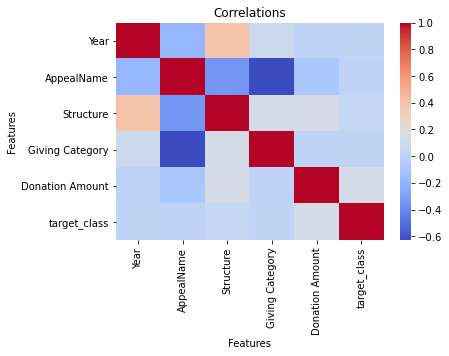

In [ ]:
# Calculate the correlation matrix for all columns
corr = df.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr, annot=False, cmap="coolwarm")

# Labels and title
plt.xlabel("Features")
plt.ylabel("Features")
plt.title('Correlations')
plt.show()

In [ ]:
### Model 2: Clustering - KMeans for Segmenting Donors Based on Profiles
# Using KMeans to cluster donors for personalized engagement strategies
# Here we use KMeans to find clusters within the donor data

kmeans_model = KMeans(n_clusters=3, random_state=42)
donor_clusters = kmeans_model.fit_predict(scaler.fit_transform(X))

# Add cluster information to the original data for analysis
df['donor_cluster'] = donor_clusters

# Analyzing clusters
print("Donor Cluster Analysis:")
print(df.groupby('donor_cluster').mean())

Donor Cluster Analysis:
                      Year  AppealName  Structure  Giving Category  \
donor_cluster                                                        
0              2020.284553    5.975610  10.206685        17.726468   
1              2020.538136    1.603814  13.915254        37.595339   
2              2016.008044    6.000000   4.876745        18.576768   

               Donation Amount  target_class  
donor_cluster                                 
0                   430.309666      0.625836  
1                  1105.379237      0.631356  
2                   195.105512      0.592146  


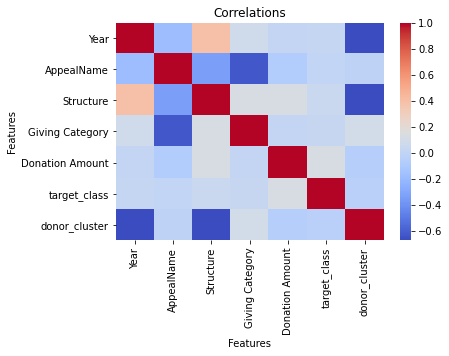

In [ ]:
# Calculate the correlation matrix for all columns
corr = df.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr, annot=False, cmap="coolwarm")

# Labels and title
plt.xlabel("Features")
plt.ylabel("Features")
plt.title('Correlations')
plt.show()

# Deployment
Key Steps for the deployment:<br>
1. Finalyze preprocessing and model training/pickling code.
2. Develop a script/API endpoint for serving the models.
3. Integrate the models into the application frontend.<br>


In [ ]:
import pickle

# Save the clustering model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_model, f)

# Save the classification model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Load trained models
with open('kmeans_model.pkl', 'rb') as f:
    kmeans_model = pickle.load(f)

with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Endpoint to predict donor segment
@app.route('/predict-segment', methods=['POST'])
def predict_segment():
    data = request.get_json()  # Expecting JSON payload with donor features
    features = pd.DataFrame(data)

    # Preprocess and predict segment
    segment = kmeans_model.predict(features)
    return jsonify({'Segment': int(segment[0])})

# Endpoint to predict engagement likelihood
@app.route('/predict-engagement', methods=['POST'])
def predict_engagement():
    data = request.get_json()  # Expecting JSON payload with donor features
    features = pd.DataFrame(data)

    # Preprocess and predict engagement
    engagement = rf_model.predict(features)
    return jsonify({'Engagement': int(engagement[0])})

if __name__ == '__main__':
    app.run(debug=True)
